In [1]:
import pandas as pd
import pyarrow.parquet as pq
import pyarrow as pa
import numpy as np
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [1]:
print(1)

1


In [3]:
lis = ['GGTCGAAGACGTAATCGCGGGTGAC','GAAATCTGGCTGAAATCGATAGTGA','GCCGCACGGGCTTAACAAGTCTCGA','AGATCGGGGCGTTGAGGCCAAGCGC','CTGGCAGCCTGTCTGATCTGCAAAA',
 'CGGAATTGCTGTCCACTTCCCAGGA',
 'AACGCAATGGACGCCAGCGAATAGA',
 'CGAAAGATTCGCACGATATTGCAAA',
 'ATTTCAAAATAACGAAGATCGGCAC',
 'AGAAGGGCGGCCACACGCGGTCCTG',
 'AAAGCGCGCCAGAATGGATTCGACG',
 'CCATTCCAAGCCCTTCGGCCAGATC',
 'AAACCGAGTTCATAAGAACCCGATT',
 'AAGCCCTTGGCGAAGATCGCCTCCG',
 'CTCACGCCACTCCCAAAACAGGGAA',
 'CTTATCGCCGTAACCCCTGTCGAAG',
 'GGCGCCGTAGGAAGCGATGATGTCA',
 'AACGGCAGCGCCAAGGCCGGAGCCT',
 'GAAACAGGAAAAGCCGATTGCCAGC',
 'AGCAAAAGCAGGAAAACCAGATCAA',
 'ATGCCACTGCCGACACCGCCAAAAT',
 'CGGTCGCGTCCGATCTTTCGGGCGA',
 'ATGCGTCTCACCAATCAGGTCAAAG',
 'CGAGCGGCAGCTTATCCTTGAGCAG',
 'CAAGTCCACTGTCGTCATGTTTGGC',
 'ACGCAGGCTGCAAGCGCAATACGAT',
 'CACGACCGCTCAGATCGAGAAGCTG',
 'TAGACGCGGTATGATGCGGCCGGGA',
 'CGTAATATTTCAGATCAATGTCGAG',
 'GCGCTGGAAGCGGTTGGCGGTTATA',
 'ATGATGCTGGTCTTTCGATGGGCCA',
 'ATCTCTTGTTGGGTTTTTATCCTCA',
 'AAGGCGCTGCAGACCGGCTCAAATC',
 'CATCCATGATCGTGTCGAAATTTTC',
 'AACGATCAGCCGTGTCTATCGGCGG',
 'CGCCAACGATTATCGTAAATATCAA',
 'GAACCGATCAACACAAAGGGAGGAC',
 'CCGGCAGGGCGACCATGACGGAAGC',
 'CGGCATCGATATTGTCGATCCCATC',
 'GCCGCATGAGGCAATTGGCGAAAGC',
 'CAATTCATTCCGCGACGGCGACCGC',
 'CTTCAGCACACGGCGGCAGGCGAGC',
 'CAATATTGGCGACACGCGCTCGCTG',
 'TATTGCGTACCGTTGGCCAGCATCA',
 'CGATAATCGAGGCAAAACGGCCACG',
 'TCACTACAGCTAGAACGCATCCCGA',
 'TCTCGCTCATCGATATCGTCCACCA',
 'CTGGCCGGGGCCAAGCGCGCGGCGA',
 'CATGTCCCAAGGCGCAAGAAACTGG',
 'CGGCCTCGCAAACGCCGAGCAGAAA',
 'ACACAGCATCCAGCACGACAATCTG',
 'CCCTGCAATATGGGTGCTCCGGTCA',
 'CATTCCCGATCATATACTTGCAGCC',
 'AGCCGCCTTTGAGGATTTCCTCATC',
 'GGACCTGCAGGCCTTCCGACTTGCC',
 'ACATCGTCCTTGGACGAAGAGGCCT',
 'CGCGTCTCCAGAAGGCCTATGCCAG',
 'ATCGCCAGCCGTTTCAATGGCAACC',
 'CGTATCAAGAAAGCCTATCCGAATA',
 'ATACCGGGGGGGCGTTATCCGCGCC',
 'GCTAGCCGTTCGCCCTTGCGTTCCA',
 'AGGATCGCGGGCTTAGGGATGGAGC',
 'GGGCTTCCAGTCGGCAAGCGTGGCA',
 'CTGTGACTGCACCCAAGGCACCTGC',
 'GGCATTCAAGCCCGTCAAGCGCGGA',
 'ATGCGGATACTGACCGTGCACACGG',
 'ACAAATCATAAGCTGAGCGATGCAT',
 'TCCGCCCGTCGAAGTAAAGCCAGGA',
 'CCTTGTGCCCACGTCCGATCAGTTC',
 'ATGCAGCAGCATCACCGAGAGCGCA',
 'GTTTTTACGCATCAGCCCGTGATCA',
 'CGGGAATGCTCTAACCGCCGTATTA',
 'CATCACGAGATCGAACTTGTGGTGG',
 'CGTTGAACATGAACTTGAACTGGAA',
 'AGACGTTCCGCACCGAAGGCAAGCA',
 'AGGGCTGGTTTCAGATTCAGAGCCC',
 'ATCCTGTTTGTGCACGAGGCGGAAC',
 'GTCTGTCGTGCGGCCCGTGCGCTCA',
 'CGGAATTATGTTCAGTAGAAACTCA',
 'CTGCCGCCAGCATCAGCCCGAAAAA',
 'CCTAGCGCGAACGCATGTTGCGCAG',
 'GATGTGCCGGGTGATGATGCGCAGA',
 'AATGATCATAACTGGATAACCATCA',
 'GCCGTGGCCAGCGGTGATTCCGTCA',
 'GCTGGCTCAAGATTGACGAAGCTGA',
 'CGGCTTCCTCCTGAACGGCGGCCTC',
 'AAGCCGTAATCCGGGCGGGCGCGGC',
 'ACCGTTGTTCGCGACAAGCCAAGCT',
 'GACCACCACAGTTCTTGAACTGCAA',
 'CTTTTGCGCGCGGAGTTTGAGGTAC',
 'AGTCCCGACCGGCACGAAGCGCGCC',
 'AATGTCCAGAACTTCCGGGAATCCT',
 'CGAGTTCAGGTTGCATCACAAATCA',
 'CTCGGCACGCTTCCGCCTTCCCTGC',
 'AACCGAACTCATTTGAAAGTTCATA',
 'AGCCGAATAGCGATAAATCGTCTTC',
 'CTGAAAATTTATTGTTTTAAGGAAA',
 'ACTCCGGCACCGGCTACCCCGGCGC',
 'CTGCCGGAATATCCGGATAGTCAGA',
 'ATTCGCCGTTCAAAGCTTTGTGAAC',
 'GCGCAGCTTGTTCAGGAAGCGGTCA',
 'CTGCATGCTTTAGAAACCCATAAAG',
 'ACCTGGTACATGGGCATCGGCACTG',
 'ATACATTCTATCGCTGGGGGCTTTG',
 'CCAGCAAAGGATGATCCATGGTCGA',
 'AGGCTTTCTGCCGTCGGATAAAGTG',
 'AAGGATAAAGGCGGGGCTAAAGGCA',
 'ACCTCAATTCATTCGATACGAGAAG',
 'CCCAGACCTTCGACTTCCTCGATCA',
 'ACGATGAATGTCATCATGATCGATA',
 'CTTCCCAAGGTGAAAGTTGAAGTCA',
 'GATCCCCGGATAGGAACGCAGGATC',
 'GGTTCGTTGCACAGCCCGCAAGTGA',
 'CAATTGATGGTACGGGGCTTGCGTG',
 'ATAGAAAGCCATGACGCCTCCAGCG',
 'CAGCGTTACCGCATTCACACATCTC',
 'CGAGAGTGTCTCCGAAAAGACCGGA',
 'TCGCGATAGTCGGTGACGGCATAAA',
 'GCCGGTTTTCATTCGTAACCGCTCC',
 'AGGCCATTGGCCGGTGCGGCGGCAA',
 'GAAGACGCTTCACACTTTGTACCGC',
 'AATCGCATCGCCTATGCGGCAGCGC',
 'CGATCAGCCATTCTATCATCTGCTC',
 'CGATCCGCATGGTCTTCACCATAGA',
 'TCCTCCGGCCAGTGCTGGTCTCTCA',
 'CATGGGCTTCCGGCCCGTCATTGCC',
 'CGCAATCAATATTGCTGTATCTCGC',
 'TGGATGAGGCAATTGCCGCGCAAAA',
 'GACGGAAGAAAAAGGCCCAAAGATC',
 'ACTCGTGACAATGACTAAACTTAAT',
 'ATCAGCATGAACGAATGAAGAAGGC',
 'AATGGTCATGGGAAATGCAAAAGGC',
 'GAAGCCGCCTGCAAGCAGGACCTGA',
 'ATCGTTAAGCTATCGGAAACCAAAA',
 'CTTCTGCGCAACCGCACACTCAGCA',
 'AGTCTTATTCTTGCTTTCCCATAGC',
 'AAAGCGGCTTTCATGGTGCAAGTGG',
 'TCATTGGCATGAAGGTGAAGGCCGA',
 'AGCGCATGATCGGATAGAGGAAATG',
 'GATCTGGATGCGGATGGAAGCGGAC',
 'ATGGCCAAAGAACAAGGCGCGGGAA',
 'ACGGTCGTATGATCGCGTCCGCCGA',
 'ACCTCATCGGCTAAGACCGCGATCG',
 'GGCAGCGACATGCCGGTATAGCGGA',
 'ACAAACTTAATCGCCATTCTTTTCT',
 'GCTGGCGACCCTGTTTTGTATGGCA',
 'AAGATCGCCATCCTGCGTTATTTCA',
 'AAGCCGCCATGCATGAAGGAATAGC',
 'CCATGCCCGTATCGGTCGCAATGTC',
 'CACGTTGGACATAGGGGCCGAAACG',
 'TGGCCTGATCCGTCAGGAACTGACA',
 'CTTAATCGTCGGAGGGGGGCATGAA',
 'CATAGCGCGATTGGCTGAATGTTTC',
 'CATTCTGGCGCCCGATCTGTCTTTC',
 'ACGATCTCCAGCGGAATAGAGGAAT',
 'CACCGCATTGAAAACAAGGCCGAAG',
 'AACGCACGCTTCTGCGCGGCTTTAC',
 'ATTGAAGCCGGTCGTGCGGGCGATC',
 'GCATTCTCACCATGATCGACCCGCA',
 'AGCTGGAACCGGAACTGGCTGATGC',
 'AGAATAGCGCCAGATCGAGTCACCC',
 'CCAGCGCCTTGCCTGTCAGTTGCAG',
 'ATGGCGGTGGCGCAGGCCCAGCATG',
 'CGATTTCATTGCCGTAGCGATCGAG',
 'TCATGCCCTCCACCGGCACGGGAAA',
 'ACGGCGATAGTCGGGAGCATCATCA',
 'ATTGTCCAGAACGCGCTTCAGGTCG',
 'CGGAAAAGCGCCGGCGAGTTGTGCA',
 'CATGTGTATGGCTGCTGCAAGGACG',
 'CAAGCCCGGCAGCAGTGATCAGCGC',
 'CTTGTTTAGGTTTTTGGTCCCAGCA',
 'GCCGAACACCAGACCGTAACCGCGC',
 'GGAAAGCGCCTTGGTTATATCGGCA',
 'AAAACCGGCCTGCGTGGTCGCGCTG',
 'GCATCATCTCCAAGGGTATTTCGGC',
 'AAACGCCCGACGAAGCAACAGTCGT',
 'AGGTCAGCAGGATTTCGCCAGCACC',
 'ATGTGCAGCTTGAAATTTTGAAGAC',
 'CATGGCCCTGATCGGTGAACTCGGC',
 'AGACGACGATGTTTATCAGTACCGC',
 'CGCGCTGCACTGATCTATCTCGAAA',
 'GAGATTTTCAAACGGCACATAGCCC',
 'CTCTGGACGGCGGCACGGCAGCCGC',
 'CTGCAATTCTTCATTGGCTTCGGTA',
 'TCACCGCATCCTCGATGGTGATGAA',
 'AGAGACGCGCAACAGAACGCGGCGC',
 'GTGGTGCGACGGCAAAACACTCACA',
 'AATGCCCAGTCGAAGGAAAGCGCGC',
 'ATCTCTAAAGACTCGCACATCACAA',
 'CTCGCCATCATCCAGTACAAGCGTC',
 'ACGGGCGCGTCACATCAAGCGGTGA',
 'CGCTTCCAAGGCGACGCAGGATGCA',
 'GCCCGCTTGCAAGCCTCAAGCCGAA',
 'CCCGCAACGGGAAATTTGTGCTGCC',
 'CAGTGCTGTGAATTGTTCCGGCTGC',
 'AGGACCGCGCCCAGCCGCTCTTCCA',
 'CGCAAAAAGCTCCAGCAACCGGCCC',
 'CGCGGCCGAAGCCGCCGCCAACCCC',
 'GCCGCAATCGTCCAGCGTGACGATA',
 'ATCCGCAGAGGACAACCAGATGAAT',
 'CTGTACGAAACCGATAAAGGCAATC',
 'ATCCCCGATACGGCTCTGGATATTC',
 'CCAATCTGCGCGCCGTAGAGATCCA',
 'AATATTCTTCTCATCCGCCTGCAGC',
 'ATTGGGCAGGCTGGAGATTTTTTCG',
 'AGCTATCGAGCGCGCCAAGGGCAAG',
 'ATTTCCCCGAAGTCATTTCCGGCTC',
 'CGCAAGCGGCAAAATGGCCTCGGCG',
 'CTCAATACAAGACAAGGCAGCGACC',
 'CTGAAGGACCGCGCGGTTTTATAAG',
 'CCTGTGAGGCCAGAAGCCTGTACCG',
 'CAAAGCTGCGCTATCCGCTGGTCGC',
 'AGCCCGAACTCCCCTCGCCATAAAC',
 'AGGCCTTCGCTATCGATAATGGACC',
 'AACATTCACTAAAACTACTGAAATA',
 'GCTTTCCGCTTTCGATCCGGCCGCC',
 'CGTGGCCGAATATGCGCGCGATTGC',
 'ATAAGGGCAATCGCTGCCATTAACC',
 'ACCTCGCCGCGTTCGTTGAGAAGGA',
 'GCGCGTGACCGAACACGACATCTGA',
 'CAATCGACATTGCCTCCAAATGGGC',
 'CATCGGCAAGCTGATATTGTGTCAG',
 'AAGGATTAGAGCGCCGATCCGATTC',
 'AAATATTGGTCTGTCCGACCTGCTT',
 'AAAATTGCCGATGCCTGCGACATCG',
 'TCTATGCCGAAACCGTTGCTGGCAA',
 'AAATCCTTCGCACTTTCGGCTATAA',
 'GCATTTCGTCGAGAATGGCAAGGGC',
 'CCGCTGAGAGTGTCTGCACCGGTTC',
 'AGGACAACTGGTTCCGCTATACGCC',
 'AGGAGATCGTCAGGAAGCACGGCTG',
 'AACGGGTACCACCATCACCCTTTCC',
 'CCGCCGTTTCCAGCTTGACGAAGCG',
 'CAGCCCGTCTTCCGCAGCCAGTTGC',
 'AGGCCGAGATTGAGGCCGTAGTCGC',
 'CATCACGTTGCCGATGATCGCCCCA',
 'GAATCCCGGAATGAAGGCCACGACC',
 'CCGGGGCAGGCGCGGCGCGTGATGA',
 'CGGGCTTGCTGCCGCCGAACATGCC',
 'GGCGATACAATCCGCAATCCGCGCC',
 'AGATCGCTTCGCAAAGCTTGCAGGC',
 'GCAACGGGGGAAAAAATGACACCGA',
 'CACGGATAGACTTCCTTTCGGAATC',
 'CATGCTCGGATTGTTCCTCATTCCG',
 'CGCGCGGGGCGCCATCGCTAAAATA',
 'CTTCTCGATGCCGAGATGCGCGCGA',
 'TACCATTCACCGAAACTTTGCAAAA',
 'AGCACTGACATCGAAACTGTCGAGC',
 'TCGATGTTCTGATGCGCATAGGCCA',
 'CGGGCAACTATCTCTTCTGAACAAC',
 'CCTGCAGTAAGTTGCTGCCTAGGGC',
 'ATGACCTTGTCCTGGACCGGCTTCA',
 'CCAAGCGCATGATATTCATTGAGCC',
 'GCTGATGGGGAAACCGCCTTTGGCA',
 'GAAGCAAGCTGGGTGGCAAGCGGGC',
 'AATTGATTCCCATGCAACAAAAAAG',
 'CTCGATGATCGAGAACAGGATTTCC',
 'ATGATCCATCGCAACGATCTGGTCG',
 'GCGCTGAACGACACGGCCGTGCGGA',
 'CCTTGATGACAATATAGGCTGGCGA',
 'GCACGCTTGATGCCACCGTGGCGGA',
 'CGAATATATTCGTCGAATTCAAGCG',
 'AACGAACCGGTTGACTGCGGCGGCT',
 'AGGGTGCGCGAAATCTTCGACAAGG',
 'GAGCAAATAAGCGAACAATGAACGA',
 'TATCCGTATATGACGGTGCGCGAAA',
 'GGCTGGTTCAGCCGCACGCTGATCA',
 'GAAGAAACCTCTTCGGACTACGACC',
 'TCCTGATTTTGCACGACCGCCTGAA',
 'GCGATGACGCGCGTGAAGATATCGA',
 'AAGTTTGAAGGAGGGCAGATGAAAT',
 'GCTTGCCAATTACTATCGTCACGAA',
 'AGTTGAAATGGGTACCAGCCCATCC',
 'AACCGCAACCCGCCCCTCGAAAAGC',
 'CGCCTTGACGGTGCTTTCAACGGTC',
 'GAAGCCGGCCAGGCCTTTCTGGTGA',
 'ACCAAGTTCGCTTCCGCCTTTTACG',
 'ATGATCATATCACCATTATTGACTG',
 'CATCGGGGCGAAGCTTGCCATATCC',
 'ACGGCGGTGAATGTGTCGCTGTCCA',
 'CCAATTGTTCCATCCGCCGCCCGCA',
 'AGGTCAGGGCTTCGCGGCGCTGGGC',
 'ACAATCTCTTCATTGATCGTCGCAA',
 'CTTCTCCCAAAGCGGGCGCTCCAGC',
 'CGGTCTCGTCTTCAGGAAATTCGGC',
 'ACAGCGGCGGAGGAAGCCCGTCACC',
 'GCGATTTCGACAAGCTGCTGCTGAC',
 'CCAATAAGCGCCAGGAACATGCCAA',
 'GGGTACGCTGCTTCTATCCGGGACC',
 'AACTTGCAACGCTCGTTACCGTTGG',
 'CGGTGTCTTGCGTTTCTTCAGGCGC',
 'ATTTGTAATCAACAGCCGGTCCACA',
 'GTCGGCTCCAGCGGGCCGGTCAACA',
 'GCGCAGCCCTCTTCCCATATGGAGA',
 'GGAAATGACCAGCGCACAGGGGCAA',
 'ATGTTACGCCCGCGCCCACTTCGCG',
 'CAGCCGCGCCAATCGCGCTGAATGC',
 'ATGCGACTTTATCGCAATGCAGCCA',
 'CAGAAGCACATAGCCGCCAATGCGG',
 'GTAACCTTCGAAAATCCGGTCGGGA',
 'CGCATGGGGGTTGCCCATGGAGGCG',
 'TCAACTGGAGCAAGTTTACCTCCAA',
 'CATAGATCAACTCATGAGCGACCGG',
 'GTTGTCGATCCGGCGATCATGCTGA',
 'ATCTTTGCCGATCCGCCCTATAATC',
 'CCCAGGCAGCAAAAACGCCGATGGC',
 'CGGCGCGCAAATCGTCCGGCACCCG',
 'AAGCAGCTTGGCGTCAATATGGCAG',
 'GTAAAAGTGGTGATGCGCGACAAGA',
 'ATTGAAATATACAAATCTATTGCCA',
 'ATATAGGGGGCAAGCGACGCGCCCA',
 'ACCATGCCGCCCTTAAGGTCGAGCG',
 'AGGTCGGTTTGAGCCGAACACCCGC',
 'GACTTTGAGAGGGCCTACAAATGGA',
 'GCTCTCATCATTGTGCCGGTTCTCA',
 'AGGTGTGGCGGGTTCCTGCTTTTCC',
 'CAAGCGCCTGCCGCTTCATTGAAAC',
 'TCGGCGTGAAATTATCATTGCCGAA',
 'CGGCCTGAGCCGATGGGCGCGCCCC',
 'CCACCACCCATTGCTTGAAACCTTC',
 'CGGATTGATCGGATAGGGGAAATGC',
 'GCTCGGGTAGATTTTCGCCCATGCC',
 'GGCGCTTGCAATCGAAAGCCGGAAA',
 'AAATTGGAATGGTGCTCAATCTCGA',
 'ACATCATCATCGTTCCGGGCTGGAA',
 'ACACAATCGCTTCCGAACTGGGCCT',
 'ACTGTCGCGATCGTAGAGATATCGC',
 'CCCACTTCATGCGCCAGAACATAGG',
 'AACGCGATTGCGGTGATATTTCCGC',
 'AAGGCGCGTCCTTTATCGTCATCTA',
 'AGCGCCAAGTTTAACCAGCCGCATA',
 'ATCAGCGCCAGCCAAAGCGCGATCA',
 'AAGCTTGATCTGATCCTCGATGCCG',
 'ACACGCTTTATCATGTTGAGGAAAA',
 'CACACGCCGACCATGAAGGCGAGGC',
 'CATCCGTCACAAGTTTGTGTTCACG',
 'CCGAGCCGAGATCGGTATCGAGACG',
 'CCATGGTCGCATCCGTTCCGCGACA',
 'GCTGCTTCATCCGGGAAACGCCAGA',
 'CAGTCGATCCGCGAGCGGCTCGACG',
 'ATTTTCTGGATGACATTCAGAAAAC',
 'AATTTCTTCGCTGGTGAAATTGCGG',
 'CAGACTTTCGCCCGCACGATGACAG',
 'CAGTCCCTCGGCAACTGCGCTCTGG',
 'CCACAGCGGGAAGGTGCCGTTGAGG',
 'CTGGTGATCGACCTCGTGGTAGCGA',
 'CGTCGCTCGATATCCTGGGCGCACC',
 'CGACCGCATCGCTCAGGATCTCGAG',
 'CGCCATTGCTGGCCCGGCATGAAAC',
 'CGGACAACCCGCTATGTCTCGCCAA',
 'ACGGTCTTGATCGTGTCGGTGACGG',
 'GTCACTTTCTTGGCCGGACACCCCA',
 'CAAATGAAGGCAGAATGCAATTTGC',
 'AGCGCGCCAGCCAGCAGACGGTCAC',
 'CGAGCGGGTCGCCATCGGCAGGGGA',
 'ATCGAAATATTGATTATGGCTATGC',
 'AGTTGCAGAAGCTTGCCGAGGCCAA',
 'CCAAGGCGCCATCGGCCGAACTGCG',
 'AGACAATAATGTCGATCAGGCGCTG',
 'GCACTCCTGTGGATGGCTGGCAGGC',
 'CTTCCAACACATAGAGGCCGTGTTC',
 'AGGGTTAACTGGCCGAGATCAACCT',
 'AAATGACCAAGCTTCTGATCCGCGG',
 'GCAAGCCCCAGCAGCACAGATACCA',
 'ACGCCACAGTCACGCGTTGGAGCCT',
 'GCCCGGACTTGCAAGGAAGGCACGA',
 'GTAATCGGGTTTCAATCTGTATAGA',
 'TCCGCTTGAATATGCGGACTTCGAA',
 'GCTGCGGCTCGCGGCCTCTCCGTCA',
 'ATGGCAGGCCTTCTGCTCGCTGCCC',
 'ACGCCAATTGTTCCATCCGCCGCCC',
 'ATCGCGATAGCGATCATTCAGATGC',
 'ATCGGACTGGACCCAGTATTCCGGG',
 'CCATGGGCCTGATGCGCGTCGTCAA',
 'GCCAAAGGGATCGATGCGGAAATCC',
 'CCCCGCATGCTGGGTGATTTGCGTC',
 'ATCGCATAAAGAACCAGCGATGCAA',
 'TCATAACAAACCGGCCTTCATAACA',
 'GCGGTTTCTGATATTTGGTGGTGGA',
 'GACACACTTGATTTTACAGGCAAGA',
 'CGCTCGCGGTCCGCCTTGTTATCGA',
 'GCAGGGTAGAGAAGAGAGTTTTCCA',
 'ATCGGCGCACGCCAGAGCGACATCC',
 'GCTTCTGTAACGGACGATTGGGAAA',
 'ACTGCGCGAACGGTTCGGCATCGCA',
 'CGAAACCTTTGTCCAACCGCGATCC',
 'CTGGATCGCATAAAGAACGCTTGCA',
 'CAGACGGTTCGACCGGCGTCGCAGG',
 'CTTCTGGACCTTCTTTTCAGCGAGC',
 'ACAAAGCCGCCCATGAAGGGCGGCT',
 'ACTATAGCGCGAGCGGGAAAAGGAA',
 'CAATCCAGTTGCTCTCGCGGTCCGC',
 'CGGGTCTGGCGCGCAATCACCGCAA',
 'CGACGTGCAGCTTCTCGGCAACATC',
 'ATGATATATTGCTGCAATTCCTGCG',
 'CGCAGCAGCGCTTTCGGTCCCTGTC',
 'CGATGTTTGGATAAAGCTTCTTCTC',
 'ATCCATAATCGTATGCGTACTTCAA',
 'ACGCTCGGTGAATTCCTTCTGGCGA',
 'ATTTATACCCAGAAATAGGGAAATC',
 'ACGAAGGGCATTGAGCTTGCAGGCA',
 'CGGACCACGAAGGCATCTGTTGCGC',
 'CCAGACACTTTCATCCGGGATGGAA',
 'CCTCGAAAGTCGTGGTGAGGCCACC',
 'TGCGAGCCAAACCGTTTGGCCCGCA',
 'TGCAAGCGCGCAATCTGCTCGATAA',
 'TCGCGTCTGGTGATCGCGCAGTTCA',
 'CCATTTCGCTGCCGCGTTTTACGCC',
 'CCACGATGACAGCAAGAACATTGAG',
 'AGACGGAATTGGGGCTCGGCTGAAG',
 'AACTGTTTGTCTACGCATCGCAATT',
 'CCGGTCGGGCGCGTGAGCGGTTCTA',
 'GGGGTGAAAAATTCCGTGCTCTGCA',
 'CTGGCCGTCGTCAGGGCCGTATCGC',
 'GCCCGCGAGCATCATCCCGATTTGA',
 'ACGTTCAAGGGTGATGCGCCGCCGC',
 'ATTTTTAGGTGGTCCTGATATGTTC',
 'GTGAGCCGCTGCTCGAAACCGTGCA',
 'CATCACGACGACAGCAGCCGGTTTC',
 'ACGAAAAAGACAATTGGGGGGTCGA',
 'CGTCTCATCGCACTCTCGGCCCTGC',
 'ACGGACTTTTCAGATGAGAGTGCGG',
 'CGGTATTGGTCCGCGTGGCAACATC',
 'CTCCATCAATCTGCAGGCAATTGCC',
 'AGCGCCGCGAAGCGACGACAGAAGC',
 'CGAAATCGAAGAGATTTTCGCGCGC',
 'ATATCCGGCTGCAAGCTTCGTCCGC',
 'CGGCTTTCTCATGACAGACTAGAAG',
 'AACTGGAATTTGCCTATGCAGGCGA',
 'GCGTGCTTTTCACACGGCCCTCGCC',
 'ACGACCATAATCCTTGTCACGCACG',
 'CAGTTTGCTGTCGACGACGAGAAGC',
 'CGGGAGGTTTTTTCTGACGCGGCCC',
 'GGCATTGCGCTCTCTGGAAACGGAC',
 'ATTGTCATCGACGCAAGCGTTCCGA',
 'GGTGCGCACCCTTTCCGATGGTGAA',
 'GAAGGAGGCAAGCTTTTCACCGCGC',
 'CGACAAGTTGCTGGGGCAGCAAGCG',
 'CGGACCACAAATCATACAACGGTCC',
 'ACATCTCCATTGGCGACAAGCGGGT',
 'GAATACGCTTCAATGCGCCAACCGA',
 'CCTCGGCATCACCGAGATTCTCGGC',
 'CGCTTTGAGCCTCTGCGACAGAAGC',
 'ACTTCGGCTTGCTTTCTTCCCAGAC',
 'GATGAAAAGATCACCAGGAACAAGA',
 'ATTGGGAACGGTGTCCTTCCAGCGC',
 'AACGGAACAAGGCAAATGACAGGCA',
 'CCACCCAGTTCAAACTGGAATGCAA',
 'TCGTCGAGCACGGTGACCGTGCAGA',
 'GACTGTCGAGTAATCGGGAAAAGCA',
 'CGGCGATGGGATGCGTGACGCTCTC',
 'GCTGACGATCAGCGTAAAGACACCC',
 'CCGTATTGCCCACCCTGGAAAGCGA',
 'CTTCGGCGCGATCATCACGACATCA',
 'ATAATATCGAGCCCCTGCGCGCGTA',
 'CGCAATCAAAAGCGCCTTCGGATAA',
 'ATGTCAATTGCGGCTGGGGCACGGG',
 'ATATTGATTTTGTTGATGCCGGGAA',
 'GCGGGCTCTATGCCTGGTATGGGGA',
 'CAGCGCCTCCGGTATTTCACCGTCA',
 'AGACGCCGGACCCGGCTTTCGACCT',
 'AGAATTTGCGGCATGGCATAAGGCA',
 'ATGGCGGTTTCGAGCTGGCGCTTGC',
 'GCGCAACACCGAAAGGCATGGCCAA',
 'GATGGGGACCGGCAGATGGTGTCGA',
 'AATTTACTCGGAATCGGCTTCGAAC',
 'CCTGCTCGGTCTGGCCGCACTCAGC',
 'ATGCTGTCGCAGCATAATTCCAACG',
 'CACGAAACCTGCAAGCCACGCGAAA',
 'CTCGATGATCGGCGTCAGCGAAGCC',
 'ATGCAGGATGACAGCGCCGCACAGA',
 'ACAATCATCGCCAACAGTGGCAGCA',
 'ATTGCTACCGATATCGAAAATTAAA',
 'CCTGAGCCGCACCGGCCAAAAGTTC',
 'GCGGCCAACGTTTGGTTTGCTGGCA',
 'GTGATAATCTGACCGGCGACGAAAC',
 'GCGGGCGTGGTCAATATGGTCAACC',
 'ACCCTGCGGGCCGCCATCAATCGCG',
 'CAGGGAAAAGATCGAGGTCGGTCGA',
 'CCCCACCAATCATAACTGTCAACGC',
 'CCGCCTGATCGAGACCTCCAAGCGC',
 'GTCATTGTCACCTCGACTTTGCCGA',
 'GCCTTCAGGCAGGTCTACAGTCACC',
 'CTTCTCCTTGGTGTGCACAGGATGC',
 'CAGGCGCGCGGGCTCAATCCGCTTC',
 'CATATCGGTTTCATCTTCTTTCCAA',
 'AACTTCCTGTGACAGCAAAACCGGA',
 'ACCTATGCGCTCGTCGGCGACGGCT',
 'CAAATATCTCCCCGGCATCGGGCGG',
 'GTCAAGTATTCGGCTTCAAATGAGA',
 'CCTTCAATCAACGGCCAGCCAAGCA',
 'CCGCCGTTGCCGCGCATCTTTGCGC',
 'AAGGTTACGGAATGGCAAACCACGA',
 'CGGCGTGCCTTCCGGATCGCGCCGC',
 'ATGGCCTCGACAAGGAAAAGCTGAA',
 'AGAACCTCACCGTTGTTGAGGGTGG',
 'ATGACGGTGCGCGGCATGTGGGCGA',
 'CCTCTCGGATATCGACAATGGGGCG',
 'AGCATTCCGCCGTTTCCACAGCGTC',
 'AGCGGATTGAGGATGCCATGGCGCG',
 'ATCCTGCCCGACGGGGTGGGTGTCG',
 'GCTTCCTTGGACGCCTTTTGTCGAC',
 'CCGGCACGGGCAGGGCGGTATCGTA',
 'CAGGACTATCTCGTAACACGGCTCA',
 'AATTGTAGGTGCCGGGAAGCCAGAT',
 'GAGCACTTTTTGCCGTGCTTCTGGC',
 'CCCGCACTCATTCTGGCAGGTTCGC',
 'AAGGCGAAAATCATCAATCGCTGAC',
 'CGGGGATGCTGATTGCCGCAGGTCC',
 'GGCGGGCGAGCATTCCGACCTCGAA',
 'ACATATGCCTTGTTAAGAAGCGCCT',
 'GTCACTTTCGACGCTCTTTCGCGCA',
 'GCAACCTCCCGTCGAGCGAGGGACA',
 'CGTTCCGACTTCGAGTTGCCGAACA',
 'GCTCCCGCGGTAATGCCGCGGATCA',
 'ATGATTTCTTCCGGGATCAGCTTGG',
 'ATTCATGTCATATTTACCGGGTGAA',
 'CAAAAGCCAACGCTACGGTTCCGCC',
 'TACAGATTTGCGGCTTATGCCGTGA',
 'AGCAGCACCTCATCCTGAGGAGCCG',
 'CCGAGCGCAACGAAATCCGCGCCGG',
 'CAAGCGCGTTCATGGTGATTGCGGC',
 'AATCGGTTCTTCGAAAGTCTCGATC',
 'ACGGGAAGGGAAAAGCATGTTTCGA',
 'AGCAGTTTGTCTTTTGATGCGCATC',
 'ATTGAAAAGGCCAATTCGCTCGACC',
 'GAAGCCGGGCAACCCATTGATGAAA',
 'ACGGAAGCCGTTGATGCGGGCGCGG',
 'TCAAGCGTGAAGGCCGTCCGAGCGA',
 'CGTTTCCTCGGATCGGAAGGCGATA',
 'GACGAAGGAACCGGAGCTGGGGCGA',
 'CGGTTCTCACTTTTGGGAGACATGC',
 'AGCATATAGGCGTGCAGTTGCAGAT',
 'GCATAAAGCGCCTTGCTCTGACAAA',
 'ACAATCCTGATCCTGACGCCGGTGC',
 'ATCATCGAGGATGGCGAAACGTTCC',
 'CGCGGCAAGTTCGAGCAGATTGAGC',
 'AATAGCACACCAAAGGCAGGTGTGA',
 'ATTTCCCGTGGCTGCGAAAGGAATA',
 'GAAAGCCACCATGCCGATGAGAAGA',
 'CTACGAGGACGAAAAGTCCTGCGAC',
 'GATGGCCACATCGGCCAGACGCGAC',
 'ATTCCCTGGAATTGGAAATCAGACG',
 'ATAAAGGCGCAAAAGGAAGCGGTTG',
 'AAATGGGCGGCGGCCTTAAAAGACA',
 'CGTGGCGGGCGTGGACGGCAGCGGC',
 'CTGATTTTCGCGCTTTTCGCCGAGC',
 'GCGCTGCGCAGCATCATCTGCGAAC',
 'GCGCCTGCGGCCACGCTCGCCAATA',
 'CACGAACGGTACGTTCAATCCCGAC',
 'CCACGATTCTCTCGTTCTCCAACGA',
 'GATATCGACGTTTTCTTCCTTCCAC',
 'CCACCGTAATGTCGCCAATCTCGTC',
 'ACGTGGAAACCGAAATTCGGATTGG',
 'CGTATCGTCCCCGATCGGGTGGAAG',
 'CGAAGAAGTCGATGCCGTGCTGGAA',
 'TACAAGCTGCCGGGCCTGCCACACA',
 'CCTTGGCCTGTTGGACTTCGTGTCG',
 'AGGGAAAGCTCCATTGTATCGGAGA',
 'TCGAGCAACAGGCGGGAACAACCGA',
 'GCAAAACCGCCCGCACCGCCAAAGC',
 'TGCACTTTACCGCCCTTATCCGCAA',
 'CATCGTTGCGCGCAAGGACCTTGAG',
 'ACCGATGCCCAGAAGCTCGATACCA',
 'ATCGGTTATGACGCAACTCCGCGAA',
 'CATATCTCTAAAACGAAAAAGCCCC',
 'CTGATGGCCGACGACTATGTGGCGC',
 'CTTCTGCGCCGCCTGCTGGAACAGA',
 'CAACACGCTTGCCCTGAAACCGCGC',
 'AAGATCGGAGAATTCAAACAGCTGT',
 'AAGAAGATCTTGCGGAACTGGAAGA',
 'TCCAGATGACCATGCGTTACGCCCA',
 'AAAGGCAGGTTGATCGGCGTGGTAT',
 'GCCGATGGCGTCGAAATGACCGAAC',
 'GGACATGGAAACTGGGGTGGACACC',
 'GATGCCGGAGGTCGCGAACGAGCAA',
 'CGCCTGCGCACAAGCGCCAGCGACA',
 'CTGCGCCAAGCTCGGCCTTGAAGCA',
 'GGCTTTCCTTTTCAAAGGATCGCTA',
 'GGCGCCAGCTCATGATAGTCGCGAA',
 'AATCAGAAACTGTCTGCACAGATGG',
 'AAAACCGGAATCGGTCTCGCCATAG',
 'CGACATGAGCCATGCAACGGAGGGC',
 'GACGGTTTCCGCACCGATTTCGGCA',
 'GATCACATTGGCGAACAGCAATTCA',
 'CGCGCATCTTTCAGCGTCTTCAGCC',
 'ATGCGTGCAGCCCAAGGTGAGAACA',
 'CGACAAGCTCGTTGCGTGCGATCCA',
 'CATTGTGATTAAATACGCGGCACCG',
 'GGTATCGCCAAGGGTGCGGGCATGA',
 'GATCAGTACAACACGATCAACAAGC',
 'CAAGCCCGGCCAGCTGAAGACCGTC',
 'CAGGCTGACATCTACAAGGAACACA',
 'CGACGGCGAGGCTCGACCTTTTCCG',
 'CTAAGATTTTCTATGACGCATATAC',
 'CCAGACCATCGACGTGAAGCTTCCG',
 'GCGACCCAGGAACTTCCATTGTCGA',
 'CCACTGTTCATAAGCGCCGATCCAG',
 'AGGACGTGCTGGAAGCCCTGATCAG',
 'TGGGAATGTGGCCGGGCTTGGAGAA',
 'CGCCATCATAGCGGCCCGTTTCGGC',
 'AGAAGGACGCGGGTGCCTTCCCAGG',
 'GCCATCGGTTTTGTCGGCTCCACGC',
 'ATGCAGAACATAATTCCGGCCTTGG',
 'CGAACCGCCGATGTTTCGCAGAACG',
 'GACCATGCCGAGAATGGTCGTGGAA',
 'ATCTCGTTCGGGCAAAGCCCGAAAC',
 'ATCAGATAGTTGTAGGAAAGGATCA',
 'CTTCCATCAGTTCCGTGCGCCCTGC',
 'CTGCATGTCAGGCGCTTTCAGCACC',
 'ACGCCCAGACCGGCCAGCGCGTTCT',
 'GTGGCCGAGGTTGCCTGTTTCATAA',
 'CGATCTCGCGATTGCCATTGCAGGC',
 'GGCATTTGACGCCGGCGTGATCCGA',
 'CGGCCTTCATCATAAACGTCGTTAC',
 'GCCTCGGCTGGCAGTATCTTTCCGA',
 'GTGATGCCTTCGGCAGTACGTTCAA',
 'ATGTGCCGCCAGCAATGGTTTCCAA',
 'TATGCCCGTGCGGTCGATCTTCTGA',
 'ACCCAGGATTAAGCTAGCACGAAAT',
 'TCAATTCGTGAGATCGTGCAGTCCA',
 'ATCTTTTCCGGGCTATTGCGCACCC',
 'CCGAGCGGTGCTCCGGTCAATGTCC',
 'CGCGGCATGGTCAGTCGTGATGCGC',
 'CGGTCCTGCGCTATGACCTGCCGCC',
 'CGCAGTCGAACGGCATGTCGGAGGC',
 'CGGCCCTAGCGGTTCTCGCCTTACA',
 'CGCCACTTCCGAATGCATTCAATGA',
 'CTCGACCGAGGAAGATCTTGCAGCA',
 'AATCGATCACGACACGGTCGCCTAT',
 'CCTGGCTCGCCTTGGCATAGAGCGC',
 'CCGGAATGCCGTACGCAGGGGACGG',
 'CCAGCACCTCATCGACGATTCCCGG',
 'ACGTCGGCGCGCGGAATCATCACGT',
 'CTCACGCCCAACCGTAAGTGAATTC',
 'CTGAAAATATCAGCCTGATTTCGAA',
 'CTGGGCGGGCGCGAGATCGCGGCCA',
 'ACGCTAGCAAAACCAGATTGGCAGT',
 'GATCTTGACGTTTCCTATCAGCAGC',
 'CGCGCAGCCTCGACATTTCCGATCA',
 'AACCGATCAGCACCGTGGCGAATAT',
 'GCCGTCACAAATCGCTGTCGGCAGC',
 'GGGCTATGACGATTGCGAAGGCGAC',
 'AGCGCCAACACTGGCCATTGCCATC',
 'CTTCGCGCTGAAGATCATCACCGCA',
 'GCAGCCAGCCTGCGCAAGATCGGCA',
 'ACGGTACGGTGCGCCTGCATCGCGC',
 'GAGGTCTCGTGAAGGGTCCGCCGCA',
 'AAACAGTCATGGAGAAAGGCGTGCT',
 'CAGAGGCCGCCGCCATAGCCGGTCA',
 'CCTTGCGCACTGGATCAACGATGCG',
 'ATCGGTAGCGGAAATCCCAACCGAG',
 'CAATCCGGCGATGTTTACTGCTGCC',
 'CGCATGGCTCTACCATGGCGGCGGC',
 'ATCGCAGGTTATAACCGCAACACTG',
 'CATGCGTTAGGCCGTAAATTATCCG',
 'AATCCAGGCGCCGTGCTTCGACGAA',
 'CAATTATACCGACGAAGACCTGGCG',
 'ACGAGGGAAGAGCGCTGTGCGCTTG',
 'AGCTTCGAGTTTCTCACCGCTTGCC',
 'AGGCAGCGCGGGTCATGGCGCTTGC',
 'AGCAACGCCCGCATCGCCGAACAGG',
 'AAATGTCATATTTCGCGCCAACATC',
 'AAGGACTCGGAACTGAAGTCGTGCA',
 'CATGAAGGTTCGGCATGGCGCGCAG',
 'AGATCGAGAAAAACACCAATGAACA',
 'CGGGTCCGTTATCGTCCACGACAAG',
 'AAGTTTACGCCTGAAATCTATCAGG',
 'CGTGAGGATAGACGAGACTTCCGAA',
 'ACGAGATCGAAGCTCGCTTCGGGAA',
 'CAGGGAGCTCCTGAGTGCTGACCGC',
 'GGAATACCGGCCCGGAAAACCATGA',
 'ACGATTGTGGCCGTAAGCCGGGACA',
 'GCGCCAGACTCCGATCTCCTCGTGA',
 'ATACGTGCTCATACGAAATCCGCTG',
 'CGCCAGCTTTCCGCAAAATGCGCAA',
 'ACGGCAGCATCGCAGCTCTTCTGAC',
 'CGCCTCCAATCCGTCCGCCGAGATA',
 'CGCCGCCAAACCAAACAATCAAAAC',
 'GCCCGAAATGAAGATGACGACCCGC',
 'AGACGTGGCCGGTGGCTGCGGTTCC',
 'AATTCCAACAAGCTCCATCAATCGC',
 'CAGCGTTCAATCGAAACAAGAGCAA',
 'CGAACTCCGTATCGGCGCTTGCCTC',
 'GGTTTGACGGACGCTGGAAACAGCA',
 'CATCAGCGATCCCCATGCGGAATCG',
 'CTGCCGTCATGACGACGCGCTTGGC',
 'GATGTGGCCGCCTATGTGGTGAACC',
 'GACGAGGATCGTGACGGCTTCGTCA',
 'AATGCTTCCGGCTGCGCTCTGGTCT',
 'CCGGTCTTCTCCCCCGCACGCCTGA',
 'AACCTGCGCGATCAGGATACAGGCC',
 'ACGTCCAGTGTGTAGGGTAAAACAA',
 'GATGCAGCCGCCAAGAAACGTCCCC',
 'GAGCCAGCGCTTCAGCGCGTTTGAA',
 'CGTCAAATCGCGGCGCGTTCGCGCA',
 'ATCGTGGAAAGCATGCGCCTTTGGG',
 'CGACATATCCAACTTTATCGAGACC',
 'ATCTCGTGTGTGCCGAGACCGATTG',
 'ACTGATCCTTATACCGGGGAACAGA',
 'GCGCCTTGAGCCGCGCAATGCCATA',
 'CCGGCGATCGCCGCTGCGGCTTTGA',
 'CAAGATCATTCTTGCCGACGGCGTG',
 'AGACCGCTAAAGGCAAGCGCGGCCA',
 'ATCGACACGCTCCGCCGAAACGTCA',
 'CAACTGTTGGAAAGAGATTTCAAAG',
 'GGACGTTACATCGTTCTCGTTGGTA',
 'ATAGCCGCCGGTGGCCCAGCCGACA',
 'CATGTGAATGGTTTGGTCCGGGCGG',
 'GGTAGAGGGCGCACGCGTCCTCGAC',
 'CGGTAACGGCAAAGGCCTGCCCATC',
 'CGCCGCATCGAGGCGGCTGCCGATC',
 'CGCGCGCCAGTCCAACCAGTGCCAC',
 'AATATCTTGCAGGATAATCCGCAAT',
 'CCGCACTTTCAGGCTTCGGCTGATA',
 'GCTTGGCGAGCGAACCGGCTGCAAC',
 'CGACCAGTTGACGGCAATCGAGGCC',
 'GAGGCCGCGATGATAACGAAGCGGC',
 'GACCCTGCCATCAAGGCGCGCCGGA',
 'CAATTTCACCGGATCCGCCATCGGA',
 'AAAGCTCACGGCAGGAGAGCAGAAA',
 'ACGTCCAACGCTGTTGTCGGCTCAT',
 'ATCCGGGCGAGCGGCGAAGAGCCTG',
 'ATGGCGACCGCCGCTATGGCAAGGC',
 'GCTCGCGACTGAAGGCCAGGATTAC',
 'AGAGCCAGCGCCGCATGACCATAGA',
 'AGAATTCCGATGATCATCGCCATGA',
 'CCGCCCGCCGAATCGAGAAGAAGGC',
 'GCATAGGTGGAGACGTAATTGGCGA',
 'ACAAGATCACCTGGTTTCGCGCAGG',
 'ATGTGCTGCGCTTCAACGAACCACG',
 'ACCATCGCATCTTTCCAGACGCGGT',
 'CCGAAGATCATTCCTATGTGGTGAC',
 'CGGGCCAGACCGGACATATGCAATC',
 'CATTGCAGAGGTTCGGCAGGAAACG',
 'CGATGTTGGAGACGAAAATCTTGCC',
 'ACGCCTTGTCGAACATGGCCGTGAC',
 'GCTGGCAATAGCATTCGGCGTGGCC',
 'GTACATTTCAGCCGCCGATCGTGAA',
 'GCAGGTTGCAGGCGGCGTGCCCGCC',
 'AAGGCGATCTATGAAGCGATAGAAC',
 'CGTTTCGCATGTTGGGTACGCGGCA',
 'CGCGCATTCTTCGACGACTCGTCCG',
 'ACGCTGTCGCGCAGGCGCGGAGGAA',
 'TAATCGTCGTTGCGCTCGGCAATGA',
 'AAAATGGATTTGTACGGATGAATAT',
 'AAGCTCTTCGTGCCAGCTCTATATT',
 'GATTGACGCCGCGAAGCCGAAAGCC',
 'AGGGAACCTTTGCCAAAGCGATGCC',
 'CAGCTTGCCCGACCGTCGCTCGACA',
 'AGCGAATGCTTTACAAAACTCGCTC',
 'GCGCAGCGCGATATTCCGGCTCTAC',
 'GTCAACCGAACAGCAGGCTAAAAAA',
 'CGGCACAGCCTGAAGGTTCTGGTTA',
 'AATGCCATGGCGAAGGAAATATTCG',
 'ATGCAGACATCAGCCTGCACAATGG',
 'GGTACCGGCGCCATTCTGTTCACCA',
 'CCCCGTTTCCATGGGCATCTGGAAA',
 'CGCAAGGATGCACCGGGCGCCCGCG',
 'AGCCAACGTGCCTTACGATGAAGTG',
 'CAATCTTGTCCTGATCGAAGAACAC',
 'TTGCGCCTATCGCCTGCGCCAGCAA',
 'ATAATCGACTGATTTTGTAGAAAAT',
 'ACAGGCAACCAGTTCATTGCGATGT',
 'CATCATTGGCGCCGAGTACCGCTGC',
 'CCATCCTGATTGCGCAGAGCGGCAA',
 'AGGCGGCTTCGGCAACGCCGACGCC',
 'GATATCGTCATCATAGATTTCACAC',
 'ACGGCAATCTTCACCTTCATCAATG',
 'CAGCCAGTCGGCATTGTTGACCATC',
 'ATGATCATCGACCGGATTATCCATG',
 'AGCTGATAGCTATGAACGCGAATAG',
 'AAGACGGCAGCGAGCGCCAGAGCAT',
 'GCGATAATGTCGCGCACGGTTGGCA',
 'CGACAAACCCATCCACCTTGCCGTC',
 'AGGTGCCGTCAGGGTCAATATAGCG',
 'AACGTGATTTTGCAGGCGCACCCCG',
 'CTTCGCCATATAGCTAGATTCCGCA',
 'ATATGGCACTGCGATGACAAGGCGG',
 'CGGCGTCAAGAACCTGATGGATCAG',
 'GAAGCTGGGGTATCCTTGAAACATC',
 'CTGCGCTGTTGCGAGCGAGCCGTGC',
 'GCCTCCGGCATTGGCCTTTGCGCAA',
 'CATGAAGGCGAAGTGCGGGGCGCAG',
 'GAGCCAAGCAGCGCAGCTGCAATAC',
 'CGATGGTGTTTGAAACCAGCTCGCG',
 'TAGGCAGCAACGACTTCATCCATGA',
 'CGGCAGTCTGGAAGACCTTTGGGGC',
 'GCGCCCATAGTGTCGTCTGAAAGGA',
 'CCACCAGATAACCGCGCCCGAAATC',
 'CATGGAATGTAAACCACAATTACGA',
 'CTGACAGGCTGGTCGCCTTCGCCAA',
 'GAAAGCCAGATGATGATGATGAACA',
 'CTGTGGCGCTACCGCGTTGCCGGCC',
 'GATACGGGCTTTCGATGAAGCCATA',
 'ATACGCACTGGCAATTGTGATGATC',
 'CACCCTTGGTAAAGTCGCCACTCTC',
 'AGCACGAAGCCGGAAGCTGCGCGTG',
 'TCATGCCGACGGCGGTGATGATCGA',
 'ACCCGTCATGCGGTTGAAAAGCGTA',
 'CCGACCGCGCCGCCGCCGCTTTCGA',
 'GTGTGGAACATGGGCCACGGTTTTA',
 'GATGGCTTGAATCAGAAGACCGCCA',
 'CCATCCGTCCCTGGCCGCGTCGTGC',
 'AATATCGGCATCATTGGTGAGGATC',
 'ACCGTTTCACGGTAAGCTGGGGCGA',
 'CGACGACAGCGCTCAAATGGCGGCA',
 'GATCAGCCGATGCGGCTTGCATTGC',
 'CCGAGAACACAGCGGAAGCTGCCCG',
 'CCTTCCGCGCGCTTGCCCAAACTGC',
 'CCGACGGCCTTCAGCGCCTCATAGG',
 'GCTCCGTCGATGGCGCGTCAAAATA',
 'CATCTTGTCGTTTTCCGGCGTCGAG',
 'CCAACCCGATGGCCTACACATTCGG',
 'TTACAGGATGGAAGAATTCCGGCAA',
 'TCCGGAATTGTCTGGGATGAGGAAA',
 'CTCGCCCTTTCCTATTCCATGATCC',
 'ACTGGTTTCTGCTGAAATTCGAAAA',
 'GATCTGCTTCAGAGTGATCTCCGGC',
 'CGCGGTGCGCGGTTCAACCTCCACC',
 'GTCGCATCAGCCGGCGCGACCGGCA',
 'TATGGTTATCCAGGAGGTGACGGAA',
 'AACACGCATCCATTCGATGCCGATG',
 'CAGGACCTCGCCGAAGGAAGCGCCC',
 'CCTTCGCGCCCGCCTCCGCAAAGGC',
 'GATAGTTTGACGGTTAATGCTGGTA',
 'AAAAGCCTGTTCAGGCGAGACACAT',
 'GCCTGATTTCTGTTCATACCGTCCC',
 'AGCTTCCTTGCCATGCAAATCGGCG',
 'AGCGGCTCGGTGTCGTCTTCAAGGA',
 'AACATTTCGCCGCAAGGGGCCGAAT',
 'CCCGATCTTCACGATCTCGCGGACC',
 'GGGTCGCAAATCATCGGTTGCAGCA',
 'CGCAAGTATCATAGCAGCTGGATTC',
 'CAGTTCCACATCCACGACGCCCTGA',
 'CCCTGATAGAGGAATGTCTTGTTCG',
 'AGGTTGGCCCTTTCGAGGAAATCCG',
 'CGGCACCGTTACACGGCCGGAATAG',
 'AGGAAAGCCTGAATTTCTTGCTCGA',
 'AAGGCGAATTCATCGCCCTCGTCGG',
 'ATTCAGTCAGATATTTTCGATCATC',
 'CCCGGTTGAAACCGCGCGCGCCGGA',
 'CCGCTACACAAACCGCGCCCGAAGG',
 'CACTGGCCAGCGGTATATCCATTGC',
 'GCGAGGAAGTGCAGATCGGCCAGAA',
 'ATCGAGTTTCAGTCCGACGCCCCAG',
 'GATTTTGCGGCGAACGCCTGTCGAA',
 'ACCTGCCTGATGGGCTTCTACGGCT',
 'ATAGAGATGGATTTTCTGCTTTGGA',
 'AGCTTGACGATCTGACATTGGGCGA',
 'TATAGCCGAGCTGCGAACAGGTCGA',
 'CTTCCGCCAGACACAGGGCGCGGAA',
 'CAACTCGTCGAGCGAAGCCCGCAAG',
 'CGGCGTTCCGGCGTATCGAACACAC',
 'CTGCCGCTGTGCGCGCTGGTCAGAA',
 'ACGTGGCTCTTCGCCGTAATCGATG',
 'CGTCAGTTTTTGCTCCCGCCAGGGC',
 'GCCCTGATAGCGGGCCCGTGCCAGA',
 'CCGCGCATCTTGTCATAGAAGTCGA',
 'CGCGCGCCTATGCGGCAGCACCTGA',
 'CAAGGCGCTGATTGATCAGGGCGTG',
 'CGCATAATGACCAGATCACTGAACC',
 'ATGATGACGATATCCGGCTGTCCTC',
 'GCGGCGCCGGCGCGGACCAGCCCGC',
 'ATTTCACCAAGCTGCTTTTGCACTG',
 'CACCATGGACGGTGTGACGCGCGGC',
 'GCGACTGTTCCACAAGCCGTGGCGA',
 'CGCTCTGGCACTATGTGCGGATCAA',
 'GACGGATAACGCTTGTAGACATTGC',
 'CGCAGATAGGTCTGGCGATCCTTGC',
 'GTCCAGCAAGCCAGAAGGAAAGGAA',
 'CTTATCGAACAGCCATTGATGCAGC',
 'CTCGTGGCCAAACAGCTCGGCAAGC',
 'CCCGTTGCGATCAAGCAGAAATCCG',
 'AGAACTTGTCGCGCGCGGCGGAAAA',
 'ACGGGCAAACGCTCCATAGGCTGAC',
 'GAAGACGGCGCCTGAACCCCTATCC',
 'CATCCATATGGACAGTTCCGGTGAC',
 'ATGGGGCGTGTTCCGACCCCGCGTG',
 'CTTCTCATGGGAACGATGTTCGATC',
 'AAACCGTTCGACTGACCGCCGCGCA',
 'ATGGTTGCCGCACTGTTCTTCGGTA',
 'GAACCGGTACATGCACGGCTTCGAC',
 'GAGCTCATCTATGAGCCGCTCGTCC',
 'ACCGTGAGACACGGTTTCCCGACAG',
 'CGCACGGCGGCTGACGACCGATGCC',
 'ATGGCTGTCGGTCACATCTTCCGCC',
 'CAGTCAGATGCTTTCGCCACCATTC',
 'TCGCGCCTGCCGATACGCTGTCCCA',
 'AATGGGAGAGGATATGTTGATGAAT',
 'ACGCCGGTCGCCTGGGATGGCATCA',
 'GCAGCTCGATACAGTGCAGATTCGC',
 'TGATAGGAATGTTCAAGATCGAGAA',
 'ACGACAGACAGGCAATCACCGAGAA',
 'GGATACGTTCACGCGTGACCGAGAA',
 'CGCATTCAAGGAAATTGCCGAAAAG',
 'CTCAAGGTCATCGTGTCGGAAGCAG',
 'CAGCTTGCGAAGATGCGCGAGAAAG',
 'AAGAGCCGCAACTGGAACCGGAAGA',
 'CCTGATCCAGAAGCTTGTCGGATTC',
 'GCCCAGCATGGCAAGGGCTGCATCC',
 'CATGGGCGATACGGGTTCGCTTGCG',
 'CGATTGCCACATCCGAAATACTGCG',
 'CGCACCGTGGGCTTGCGCTCCGCTC',
 'ACGGGACTTATCCTCGAAATTTTCG',
 'GCAATTCCAACACTGTTCGATGCAA',
 'CAGCGGCCAGAATGTGCTTCTTTCC',
 'AAGCGCACCGGCTGGTCGGGCCATC',
 'CCGTCGAAGCTGTCAGATCCCCTAC',
 'GGAAAAATTCGGCCGCGAATATGAC',
 'CATCCGACTATGTTCGCCGTGATAG',
 'GGGTCGACGCCTGCTGCCTTGGCAA',
 'AGAAGTTCTCCGGTTTCAGGGGCAG',
 'GTCTCCTATTACCGGATCATTGAAA',
 'CGATCGGTGTGCCCCAGAAGCTTTC',
 'ATTGCGCAGCGCCGACCACAACCTG',
 'CATCGAAGTCAAAGGGGCGCTGAAA',
 'CCCTTCTTCGGTCGATATGGTTACA',
 'ATGGTGGAACTGGTCGGTGGAAAAG',
 'AGATGGATGATCTTATTCTGATTGA',
 'CCGTCGGGAAATGTTGCTCGCGGAC',
 'CACACCCGTATGGCCGGTCGCGTGG',
 'ATATCGTCAACCGGACGTTCCGGAA',
 'GGCTGGTCCCGATGGCGGGGCGGAA',
 'CGCTCTGGCTGGCATCCGGCCTCAG',
 'GCTCATATTGGTATCGGCGATGAAA',
 'AAATGGACAGGCCGTCGATATTCCG',
 'CTGGGCTTACGCCTGCCGCAGCACC',
 'AACCCGTGTTGGAATGGGCGAACTG',
 'AATCGGTGAAATCCTCGAACCGGGC',
 'GGCACATCCGTCTTGAGTGTCACCA',
 'CCCAGTCGATCTTTTCATAAAGACC',
 'AGCGGTAAGCTCCTTGTCGGCGGCC',
 'CCGCCCGCCGAGGCATATTTTAGAA',
 'GCTCGGTATTGGTCTGCGGCTTCCA',
 'GGAAACGCTTGAATTCATGAACTCA',
 'CAGCGAGGCGGTGCGGTTCGTCGGC',
 'TAATTATCATAATGAGTGAAATCAA',
 'ACGACTGGTCGCAGCGCTGGCCCGT',
 'GGATGCGCTCTAACCAGCGAGAAAA',
 'GAATGCCGCCTGATCATGATCGATC',
 'CCGCGCTCAGCCTTGACCTGCTTGC',
 'CTGTGGCCTGGGCGGAGCAGAATGC',
 'GGTGCGCCTTTTCAATCTCGTCGAA',
 'AAGCTGTCGTTGTTCCCGTATCGGT',
 'CGCGCCAGAAGGCGCAGCGGCAGGC',
 'GCAATCATCCCGCAGCAGTTCGAAA',
 'GCGCCAAGAATGTACGAATGGATGA',
 'CATGTGCGTTATGCCCGCCTGCGCG',
 'CGAATATGCCGCCAATATCATTATC',
 'CATTGGGTGGCGACATTGACGGCGG',
 'CCGGCGCGACCAGAAGAATGGCTGC',
 'GATGGCGAGCCGTCCAACATGATCC',
 'CGCGCGCGCATGAACTAGCTGTGGA',
 'GGCGCAGTTTTTCGGCTGCGAGGAC',
 'ACGCCATTTGTTAGCTTACTGGGAA',
 'ACCAGGTGGACAATATGGCCTTGCC',
 'ACCGGCAGTGCCAATGAATTCGCCA',
 'AGCGTCAGCGCGCCGAACACCAGCA',
 'CGAGACCCGCAAAGGGCCGCTCAAC',
 'GCGCATCACCGATATCTTCCTTGCC',
 'TGCGGTCCTGGCGGAACTGGTCGAA',
 'CCATGCCTGTGTCGAACAGCACAAG',
 'CGTTATCGACTATACGATCGTGCAG',
 'CCTCGAATGTCTTTTCCATCGCATA',
 'CCTGTGTCATTCAGAAAGCGTAACA',
 'GAAGCTATAATACGCCGCGACATCC',
 'CGCGACCACGAGCCGTGTCCATACG',
 'GCCAGAACGGCGGAGGAAACCTGCA',
 'CGTCTTAGACGCCCGGCTCTTCTTC',
 'TCATAGCGCCGGTCCTGCATGGCAA',
 'AGCTATAACGGGTAGCCAAACCGGG',
 'GCGGCATCGAGCGCATCGTCGCTGA',
 'CGCCGCCCGTCACCGCATCGCGGGA',
 'AACTCGGTTCCAAATGCCAGCGGAT',
 'CCTCGTTGGTCGTTCCGGTCTTGCC',
 'CTAGGCGCCGTTTCTATATTTGCGC',
 'CAGCCGCGGAAAGCAGGTTCCGCAA',
 'CGAAGTTCACCACGCGGATAGCGGC',
 'AGTTCCTCATCCAGCAGAACTTCCA',
 'ACGGTCAGGAAACTGGTCGGTGAGA',
 'AGTTCTTCGATGCCGAGATCGGCGG',
 'ATCTGGCTTTACTGGACGCGCTCCG',
 'ATGCGCGCGCGGTCGATCTTCTGAC',
 'CTGTGTCAGCATTGATCCAGCGAAG',
 'GCACCCGGTATGGCGGGTGAGCCGC',
 'GCCGCAGGATTTCCATGTGAGAAAA',
 'ATCAATGAACTGGAAGCGCTGGACG',
 'GCAATATTTTAGTTCCCCATTGAGA',
 'AATGGCTCCTTGACGTGGGTGCGAT',
 'GGGCTGACAAACATGCGCGGCCGCA',
 'AGGCATCGCGCGGATCTTCGCGCTC',
 'GAATTGCGCCTGCAGATGGCTCGTC',
 'AAGAATGGCAATGGCGCAACCACCG',
 'GCCAATGAGGAATGAGCCGTTCAGA',
 'CAACCTTGCGGGCGTCAGCAGCATC',
 'CCTTGAAGGCTCTGAAGCGCCTGAC',
 'ACAGCCGCGTACCGTAACCAAGCGC',
 'CTGCCCGTAAACCGAAACCGGACAG',
 'AGCGGCAACCGCGCCGCCAGCGGCA']

In [4]:
df = pd.read_csv("no_species.csv", nrows = 1000, usecols = lis)
df = df.astype('int8')

In [5]:
df_species = pd.read_parquet('final_df_species.parquet')
df_species = df_species.T
df_species.rename(columns={0: 'species'}, inplace=True)

In [6]:
data = df.join(df_species)
data

,GGTCGAAGACGTAATCGCGGGTGAC,GAAATCTGGCTGAAATCGATAGTGA,GCCGCACGGGCTTAACAAGTCTCGA,AGATCGGGGCGTTGAGGCCAAGCGC,CTGGCAGCCTGTCTGATCTGCAAAA,CGGAATTGCTGTCCACTTCCCAGGA,AACGCAATGGACGCCAGCGAATAGA,CGAAAGATTCGCACGATATTGCAAA,ATTTCAAAATAACGAAGATCGGCAC,AGAAGGGCGGCCACACGCGGTCCTG,...,AGGCATCGCGCGGATCTTCGCGCTC,GAATTGCGCCTGCAGATGGCTCGTC,AAGAATGGCAATGGCGCAACCACCG,GCCAATGAGGAATGAGCCGTTCAGA,CAACCTTGCGGGCGTCAGCAGCATC,CCTTGAAGGCTCTGAAGCGCCTGAC,ACAGCCGCGTACCGTAACCAAGCGC,CTGCCCGTAAACCGAAACCGGACAG,AGCGGCAACCGCGCCGCCAGCGGCA,species
GCF_900446045.1_58932_D01.genomic.fna.gz,0,0,0,1,0,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,Brucella abortus
GCF_005938105.1_ASM593810v1.genomic.fna.gz,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Brucella haematophila
GCF_000413955.1_Bruc_abor_biovar_1_B10-0091_V1.genomic.fna.gz,0,0,0,1,0,1,1,1,1,0,...,0,0,0,1,0,0,0,0,0,Brucella abortus
GCF_022024335.1_ASM2202433v1.genomic.fna.gz,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Brucella pseudogrignonensis
GCF_002191835.1_ASM219183v1.genomic.fna.gz,0,0,0,1,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,Brucella melitensis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCF_003984745.1_ASM398474v1.genomic.fna.gz,0,0,0,0,0,1,0,1,0,0,...,0,0,1,1,0,0,0,0,0,Brucella abortus
GCF_947242555.1_B108.genomic.fna.gz,0,0,0,0,0,0,1,1,1,0,...,0,0,0,1,1,0,0,0,0,Brucella melitensis
GCF_000698345.1_ASM69834v1.genomic.fna.gz,0,0,0,1,0,1,1,1,0,0,...,0,0,1,1,1,0,1,0,0,Brucella suis
GCF_000332835.1_ASM33283v1.genomic.fna.gz,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,Brucella intermedia


In [7]:
train_df, test_df = train_test_split(data, test_size=0.10, random_state=123)
train_df

,GGTCGAAGACGTAATCGCGGGTGAC,GAAATCTGGCTGAAATCGATAGTGA,GCCGCACGGGCTTAACAAGTCTCGA,AGATCGGGGCGTTGAGGCCAAGCGC,CTGGCAGCCTGTCTGATCTGCAAAA,CGGAATTGCTGTCCACTTCCCAGGA,AACGCAATGGACGCCAGCGAATAGA,CGAAAGATTCGCACGATATTGCAAA,ATTTCAAAATAACGAAGATCGGCAC,AGAAGGGCGGCCACACGCGGTCCTG,...,AGGCATCGCGCGGATCTTCGCGCTC,GAATTGCGCCTGCAGATGGCTCGTC,AAGAATGGCAATGGCGCAACCACCG,GCCAATGAGGAATGAGCCGTTCAGA,CAACCTTGCGGGCGTCAGCAGCATC,CCTTGAAGGCTCTGAAGCGCCTGAC,ACAGCCGCGTACCGTAACCAAGCGC,CTGCCCGTAAACCGAAACCGGACAG,AGCGGCAACCGCGCCGCCAGCGGCA,species
GCF_002263015.1_ASM226301v1.genomic.fna.gz,0,0,0,0,0,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,Brucella melitensis
GCF_902825335.1_OCH-ISR1.genomic.fna.gz,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,Brucella intermedia
GCF_000366425.1_Bruc_abor_88_19_V1.genomic.fna.gz,0,0,0,1,0,1,1,1,1,0,...,0,0,1,1,1,0,0,0,0,Brucella abortus
GCF_000705115.1_Brucella_melitensis_C-555.genomic.fna.gz,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,Brucella melitensis
GCF_000160255.1_ASM16025v1.genomic.fna.gz,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Brucella abortus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCF_006507075.1_ASM650707v1.genomic.fna.gz,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,Brucella melitensis
GCF_000366525.1_Bruc_abor_CNGB_1432_V1.genomic.fna.gz,0,0,0,1,0,1,1,1,1,0,...,0,0,1,0,1,0,0,0,0,Brucella abortus
GCF_001856265.1_ASM185626v1.genomic.fna.gz,0,0,0,1,0,1,0,1,1,0,...,0,0,1,1,0,0,0,0,0,Brucella abortus
GCF_023651155.1_ASM2365115v1.genomic.fna.gz,0,0,0,1,0,0,1,1,1,0,...,0,0,0,1,0,0,0,0,0,Brucella abortus


In [8]:
test_df

,GGTCGAAGACGTAATCGCGGGTGAC,GAAATCTGGCTGAAATCGATAGTGA,GCCGCACGGGCTTAACAAGTCTCGA,AGATCGGGGCGTTGAGGCCAAGCGC,CTGGCAGCCTGTCTGATCTGCAAAA,CGGAATTGCTGTCCACTTCCCAGGA,AACGCAATGGACGCCAGCGAATAGA,CGAAAGATTCGCACGATATTGCAAA,ATTTCAAAATAACGAAGATCGGCAC,AGAAGGGCGGCCACACGCGGTCCTG,...,AGGCATCGCGCGGATCTTCGCGCTC,GAATTGCGCCTGCAGATGGCTCGTC,AAGAATGGCAATGGCGCAACCACCG,GCCAATGAGGAATGAGCCGTTCAGA,CAACCTTGCGGGCGTCAGCAGCATC,CCTTGAAGGCTCTGAAGCGCCTGAC,ACAGCCGCGTACCGTAACCAAGCGC,CTGCCCGTAAACCGAAACCGGACAG,AGCGGCAACCGCGCCGCCAGCGGCA,species
GCF_000370385.1_Bruc_abor_F10_05-11_V1.genomic.fna.gz,0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,Brucella abortus
GCF_016126205.1_ASM1612620v1.genomic.fna.gz,0,0,0,1,0,1,1,0,0,0,...,0,0,0,1,1,0,0,0,0,Brucella abortus
GCF_947242625.1_B128.genomic.fna.gz,0,0,0,1,0,0,1,1,1,0,...,0,0,1,0,0,0,0,0,0,Brucella melitensis
GCF_000366285.1_Bruc_abor_64_122_V1.genomic.fna.gz,0,0,0,1,0,1,1,0,1,0,...,0,0,1,1,1,0,0,0,0,Brucella abortus
GCF_947242375.1_B9.genomic.fna.gz,0,0,0,1,0,0,1,1,0,0,...,0,0,1,1,1,0,0,0,0,Brucella melitensis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCF_016483965.1_ASM1648396v1.genomic.fna.gz,0,0,0,0,0,1,1,1,0,0,...,0,0,1,1,0,0,0,0,0,Brucella abortus
GCF_900236365.1_Bru_genome40.genomic.fna.gz,0,0,0,0,0,1,1,1,1,0,...,0,0,1,1,1,0,0,0,0,Brucella melitensis
GCF_900417245.1_00-3099-5734.genomic.fna.gz,0,0,0,1,0,1,1,1,1,0,...,0,0,0,1,0,0,0,0,0,Brucella melitensis
GCF_023651395.1_ASM2365139v1.genomic.fna.gz,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,Brucella abortus


In [9]:
x_train = train_df.drop(columns=["species"])
y_train = train_df["species"]
x_test = test_df.drop(columns=["species"])
y_test = test_df["species"]

In [10]:
def mean_std_cross_val_scores(model, x_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, x_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [11]:
pipe_xgb = make_pipeline(XGBClassifier(learning_rate=0.1, max_depth=10,eval_metric = 'mlogloss'))
pipe_rf = make_pipeline(RandomForestClassifier(random_state=123, n_jobs=-1))

In [12]:
results = {}
results["Random forests"] = mean_std_cross_val_scores(
    pipe_rf, x_train, y_train, return_train_score=True, scoring='accuracy'
)
pd.DataFrame(results).T

/hobbitholes/waymoot/hchen/micromamba/envs/ach.0.8/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


,fit_time,score_time,test_score,train_score
Random forests,0.713 (+/- 0.675),0.120 (+/- 0.003),0.916 (+/- 0.013),1.000 (+/- 0.000)


In [13]:
results["XGboost"] = mean_std_cross_val_scores(
    pipe_xgb, x_train, y_train, return_train_score=True, scoring='accuracy'
)
pd.DataFrame(results).T

/hobbitholes/waymoot/hchen/micromamba/envs/ach.0.8/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/hobbitholes/waymoot/hchen/micromamba/envs/ach.0.8/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/hobbitholes/waymoot/hchen/micromamba/envs/ach.0.8/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

,fit_time,score_time,test_score,train_score
Random forests,0.713 (+/- 0.675),0.120 (+/- 0.003),0.916 (+/- 0.013),1.000 (+/- 0.000)
XGboost,18.411 (+/- 0.631),0.025 (+/- 0.001),0.910 (+/- 0.023),1.000 (+/- 0.000)


species - specific spots - chi-square test on species groups - better for more features - 
80-20 split, for 60 - 20 - 20 , 60 training, 20 (chi-squared) list of importance for identifying feature(ANOVA, sklearn to get the top features, quickest way, groups = all species levels), 20 test - compare ANOVA with XGBoost
1000 features
time for program

In [14]:
param_grid = {
    "xgbclassifier__learning_rate": [0.3, 0.6],
    "xgbclassifier__max_depth": [3,6,9],
    "xgbclassifier__n_estimators": [50, 90, 150, 200],
    "xgbclassifier__subsample": [0.6, 0.8, 1.0],
    "xgbclassifier__colsample_bytree": [0.6, 0.8, 1],
    'xgbclassifier__gamma': [0.5, 1, 1.5, 2, 5]
}

print("Grid size: %d" % (np.prod(list(map(len, param_grid.values())))))
param_grid

Grid size: 1080


{'xgbclassifier__learning_rate': [0.3, 0.6],
 'xgbclassifier__max_depth': [3, 6, 9],
 'xgbclassifier__n_estimators': [50, 90, 150, 200],
 'xgbclassifier__subsample': [0.6, 0.8, 1.0],
 'xgbclassifier__colsample_bytree': [0.6, 0.8, 1],
 'xgbclassifier__gamma': [0.5, 1, 1.5, 2, 5]}

In [15]:
# random_search = RandomizedSearchCV(
#     pipe_xgb, param_distributions=param_grid, n_jobs=-1, n_iter=30, cv=5, random_state=123
# )
# random_search.fit(x_train, y_train)

In [16]:
# grid_search = GridSearchCV(
#     pipe_svm, param_grid, cv=5, n_jobs=-1, return_train_score=True)
# grid_search.fit(X_train, y_train)

In [17]:
import mglearn

In [18]:
def display_heatmap(param_grid, pipe, X_train, y_train):
    grid_search = GridSearchCV(
        pipe, param_grid, cv=5, n_jobs=-1, return_train_score=True
    )
    grid_search.fit(X_train, y_train)
    results = pd.DataFrame(grid_search.cv_results_)
    scores = np.array(results.mean_test_score).reshape(4, 4)

    # plot the mean cross-validation scores
    mglearn.tools.heatmap(
        scores,
        xlabel="max_depth",
        xticklabels=param_grid["xgbclassifier__max_depth"],
        ylabel="n_estimators",
        yticklabels=param_grid["xgbclassifier__n_estimators"],
        cmap="viridis",
    );

/hobbitholes/waymoot/hchen/micromamba/envs/ach.0.8/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/hobbitholes/waymoot/hchen/micromamba/envs/ach.0.8/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/hobbitholes/waymoot/hchen/micromamba/envs/ach.0.8/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

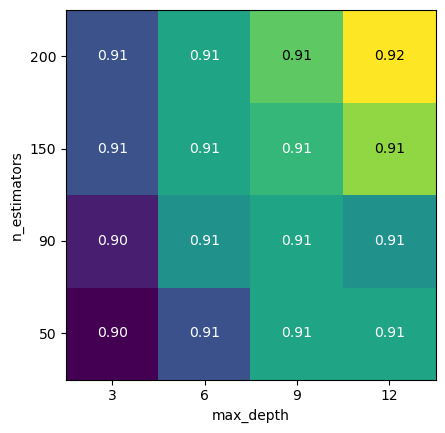

In [19]:
param_grid1 = {
    "xgbclassifier__max_depth": [3,6,9,12], 
    "xgbclassifier__n_estimators": [50, 90, 150, 200],
}
display_heatmap(param_grid1, pipe_xgb, x_train, y_train)

In [20]:
def display_heatmap(param_grid, pipe, X_train, y_train):
    grid_search = GridSearchCV(
        pipe, param_grid, cv=5, n_jobs=-1, return_train_score=True
    )
    grid_search.fit(X_train, y_train)
    results = pd.DataFrame(grid_search.cv_results_)
    scores = np.array(results.mean_test_score).reshape(4, 4)

    # plot the mean cross-validation scores
    mglearn.tools.heatmap(
        scores,
        xlabel="max_depth",
        xticklabels=param_grid["xgbclassifier__max_depth"],
        ylabel="n_estimators",
        yticklabels=param_grid["xgbclassifier__gamma"],
        cmap="viridis",
    );

/hobbitholes/waymoot/hchen/micromamba/envs/ach.0.8/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/hobbitholes/waymoot/hchen/micromamba/envs/ach.0.8/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/hobbitholes/waymoot/hchen/micromamba/envs/ach.0.8/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

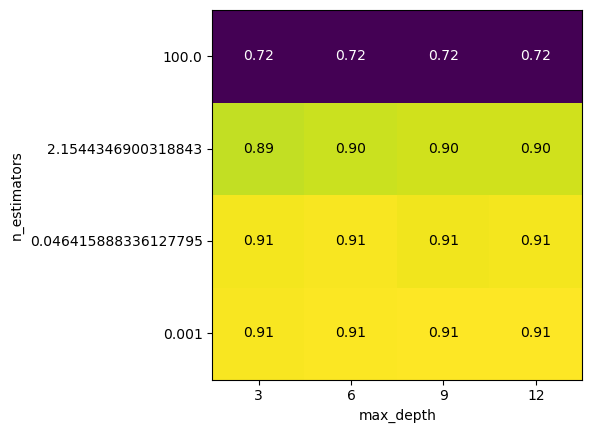

In [21]:
param_grid1 = {
    "xgbclassifier__max_depth": [3,6,9,12], 
    'xgbclassifier__gamma': np.logspace(-3, 2, 4)
}
display_heatmap(param_grid1, pipe_xgb, x_train, y_train)

In [22]:
# random_search = RandomizedSearchCV(
#     pipe_xgb, param_distributions=param_grid, n_jobs=-1, n_iter=50, cv=5, random_state=123
# )
# random_search.fit(x_train, y_train)

In [23]:
# pd.DataFrame(random_search.cv_results_)[
#     [
#         "mean_test_score",
#         "param_xgbclassifier__learning_rate",
#         "param_xgbclassifier__max_depth",
#         "param_xgbclassifier__n_estimators",
#         "param_xgbclassifier__subsample",
#         "param_xgbclassifier__colsample_bytree",
#         "param_xgbclassifier__gamma",
#         "mean_fit_time",
#         "rank_test_score",
#     ]
# ].set_index("rank_test_score").sort_index().T

In [24]:
# from scipy.stats import expon, lognorm, loguniform, randint, uniform, norm

In [25]:
# np.random.seed(123)

# y = uniform.rvs(0, 5, 10000)
# bin = np.arange(-3,8,0.1)  

# plt.hist(y, bins=bin, edgecolor='blue') 
# plt.show()

In [26]:
# pipe_final = make_pipeline(XGBClassifier(eval_metric = 'mlogloss', random_state = 123, max_depth = 15, n_estimators = 100))
# results = {}
# results["XGboost"] = mean_std_cross_val_scores(
#     pipe_xgb, x_train, y_train, return_train_score=True, scoring='accuracy'
# )
# pd.DataFrame(results).T